# Proyecto de Inteligencia Artificial
---
##VoicHelp
Presentado por : Luis Carlos Jimenez Arciniegas |
                              Diana Sofía Torres Carreño |
                              María Camila Aparicio Nova
                             

In [0]:
from google.colab import files
from IPython.display import Image
upload = files.upload()

Saving banner1.png to banner1.png


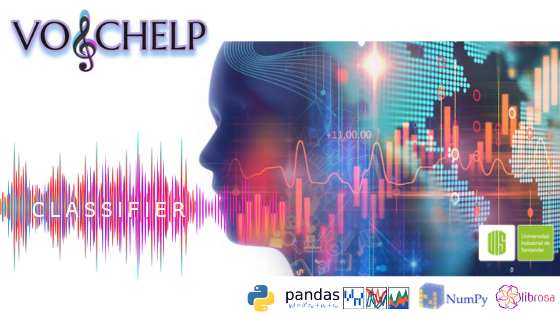

In [0]:
Image('banner1.png')

#PALABRAS USADAS:

*   ADIOS - 0
*   AGUA - 1
*   AHORA - 2
*   AMAR - 3
*   AMIGO - 4
*   APRENDER - 5
*  ÁRBOL – 6
* AUTOBÚS - 7
* AYER – 8
* BOLÍGRAFO – 9
* BONITO – 10
* BUENO – 11
* CABEZA – 12
* CALLE – 13
* CAMA – 14
* CANCIÓN – 15
* CASA – 16
* CIUDAD – 17
* COCHE – 18
* COLEGIO – 19
* COMIDA – 20
* CONTENTO – 21
* CORRER – 22
* COSA – 23
* CHICA – 24
* CHICO – 25
* DAR – 26
* DECIR – 27
* DEPORTE – 28
* DÍA – 29
* DIFÍCIL – 30
* DINERO – 31
* FÁCIL – 32
* FAMILIA – 33
* FEO – 34
* FIESTA – 35
* FLOR – 36
* FUERTE – 37
* GALLETA – 38
* GENTE – 39

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# FEATURES

*   ## *RASTA FILTERING*
RASTA es la abreviatura de Espectro relativo. Es una técnica que se utiliza para mejorar la voz cuando se graba en un entorno ruidoso. 

*   Elimina las variaciones ambientales de variación lenta, así como las variaciones rápidas en artefactos.
*   Esta técnica no depende de la elección del micrófono o de la posición del micrófono en la boca, por lo que es robusto.
*  Captura frecuencias con modulaciones bajas que corresponden al habla. 





In [0]:
import matplotlib.pyplot as plt
import librosa.display
import pandas as pd
data1 = pd.read_csv('/content/drive/My Drive/Proyecto Inteligencia Artificial/palabrasPadding.csv')
X = data1.values
p = rasta_filt(X[7])
i = librosa.stft(X[7])
Xdb = librosa.amplitude_to_db(abs(i))
plt.figure(figsize=(14, 5))
plt.subplot(121)
librosa.display.specshow(Xdb, sr=22050, x_axis='time', y_axis='hz')
plt.colorbar()

i2 = librosa.stft(p)
Xdb = librosa.amplitude_to_db(abs(i2))
plt.subplot(122)
librosa.display.specshow(Xdb, sr=22050, x_axis='time', y_axis='hz')
plt.colorbar()

*   ## *MFCC*
Los coeficientes de Frecuencia de Mel se basan en las variaciones conocidas de los anchos de banda críticos del oído humano con frecuencias que están por debajo de 1000 Hz. El propósito principal del procesador MFCC es copiar el comportamiento de los oídos humanos.

*   La precisión de reconocimiento es alta. Eso significa que la tasa de rendimiento de MFCC es alta
*   MFCC captura las principales características de los teléfonos en el habla.
*  Baja complejidad. 
*  En el ruido de fondo MFCC no da precisa
resultados





In [0]:
plt.subplot(121)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(X[0], Fs=22050)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.title('Espectograma señal original')
plt.show() 

plt.subplot(122)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(mf, Fs=22050)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.title('Señal de audio extrayendo 100 caracteristicas')
plt.show() 

*   ## *spectrograms*
El espectrograma es una representación de un archivo de audio en un dominio de frecuencia (en lugar de un dominio temporal como lo fue para datos sin procesar). Para convertir datos sin procesar en espectrogramas, aplicamos la Transformada de Fourier de tiempo corto (STFT).


In [0]:
def features(ruta):
  sr=22050
  wav, sr = librosa.load(ruta, sr=sr) #carga archivos .wav 
  filt = rasta_filt(wav)
  mfcc = librosa.feature.mfcc(y=filt, sr=sr, n_mfcc=100, dct_type=2,norm='ortho')
  mf = []
  for i in range(len(mfcc[:,0])):
    den = mfcc[i,:]
    sum = np.sum(den)/len(mfcc[0,:]) #Saca la media de cada uno de las mfcc
    mf.append(sum)
  return mf
mf = features('/content/drive/My Drive/Proyecto Inteligencia Artificial/palabras/adios000.wav')
mf = np.array(mf)

plt.subplot(121)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(X[0], Fs=22050)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.title('Espectograma señal original')
plt.show() 

plt.subplot(122)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(mf, Fs=22050)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.title('Señal de audio extrayendo 100 caracteristicas')
plt.show() 

In [1]:
# Ejecuta esta celda para activar Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Se instala progress que es la libreria de la barra de progreso.
!pip install progress
!pip install audiolazy

In [0]:
#Importar librerias
%matplotlib inline
import os
import librosa
import pandas as pd
import numpy as np 
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import progressbar, time

In [0]:
def rasta_filt(x):
    import numpy
    import scipy.stats as stats
    from scipy.signal import lfilter
    
    x = x.T
    numerator = numpy.arange(.2, -.3, -.1)
    denominator = numpy.array([1, -0.94])
    y = numpy.zeros((x.shape),dtype=object)
    zf = numpy.zeros((x.shape[0], 4))
    for i in range(y.shape[0]):
        y, zf[i, :4] = lfilter(numerator, 1, x, axis=-1, zi=[0, 0, 0, 0])
        
    for i in range(y.shape[0]):
        y = lfilter(numerator, denominator, x, axis=-1, zi=zf[i, :])[0]
    
    return y.T

# GENERAR CSV CON MFCC : 100 & RASTA FILTERING

In [0]:
def features(ruta):
  sr=22050
  wav, sr = librosa.load(ruta, sr=sr) #carga archivos .wav 
  filt = rasta_filt(wav)
  mfcc = librosa.feature.mfcc(y=filt, sr=sr, n_mfcc=100, dct_type=2,norm='ortho')
  mf = []
  for i in range(len(mfcc[:,0])):
    den = mfcc[i,:]
    sum = np.sum(den)/len(mfcc[0,:]) #Saca la media de cada uno de las mfcc
    mf.append(sum)
  return mf

In [0]:
def createData():
  #Creacion de variables para importar archivos
  rutas_palabras = "/content/drive/My Drive/Proyecto Inteligencia Artificial/palabras/"
  nombres_palabras = os.listdir(rutas_palabras)
  nombres_palabras.sort()
  nombres_palabras=nombres_palabras[:90]
  #Variable donde se crear la matriz que contiene las etiquetas de Y 
  clases=np.array(([0, 'adios'],[1, 'agua'],[2, 'ahora'],[3, 'amar'],[4, 'amigo'],[5, 'aprender'],[6, 'arbol'],[7, 'autobus'],[8, 'ayer'],[9, 'boligrafo'],
                   [10,'bonito'],[11,'bueno'],[12,'cabeza'],[13,'calle'],[14,'cama'],[15,'cancion'],[16,'casa'],[17,'ciudad'],[18,'coche'],[19,'colegio'],
                   [20,'comida'],[21,'contento'],[22,'correr'],[23,'cosa'],[24,'chica'],[25,'chico'],[26,'dar'],[27,'decir'],[28,'deporte'],[29,'dia'],
                   [30,'dificil'],[31,'dinero'],[32,'facil'],[33,'familia'],[34,'feo'],[35,'flor'],[36,'fiesta'],[37,'fuerte'],[38,'galleta'],[39,'gente']))
  
  #Crea el vector X
  total = progressbar.ProgressBar(maxval=len(nombres_palabras)) #Barra de progreso 
  total.start()
  X = []
  X = features(rutas_palabras+nombres_palabras[0])
  X = np.concatenate((X,funcion))
  total.update(0) #actualiza la barra de progreso y vuelve a hacer el padding
  for i in range (1,len(nombres_palabras)):
    X=np.row_stack((X, np.concatenate(features(rutas_palabras+nombres_palabras[i]),funcion))
    
    total.update(i)
  total.finish()
  X=np.array(X)
  
  #Crea el vector Y
  total = progressbar.ProgressBar(maxval=len(nombres_palabras)) #Barra de progreso 
  total.start()
  Y=[]
  for i in range(len(nombres_palabras)):
    palabra = nombres_palabras[i][:-7]
    clase = palabra == clases[:,1]
    for k in range(len(clase)):
      if clase[k]==True:
        Y.append(int(clases[k,0]))
    total.update(i)
  total.finish()
  Y=np.array(Y)
  
  #Almacena los datos en un .csv y se crea el dataset
  total = progressbar.ProgressBar(maxval=1) #Barra de progreso 
  total.start()
  data=pd.DataFrame(X,Y)
  data.to_csv("/content/drive/My Drive/Proyecto Inteligencia Artificial/palabras100.csv")
  total.update(0)
  total.finish()
  
  return X, Y

In [0]:
X, Y = createData()

# DATASET MFCC = 100

In [0]:
data1 = pd.read_csv('/content/drive/My Drive/Proyecto Inteligencia Artificial/palabras100.csv')
#Se establecen las variables 
X=data1.values[:90,1:]
Y=np.array(data1.values[:90,0],dtype=int)
#Se parten los datos para entrenar y predecir
n = int(len(X)*0.8)
tam=range(len(Y))
perm = np.random.permutation(len(tam))
X_train = X[perm[:n]]
Y_train = Y[perm[:n]]
X_test = X[perm[n:]]
Y_test = Y[perm[n:]]

In [0]:
from sklearn.model_selection import train_test_split
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

In [0]:
#primer intento con un SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

GN_est = GaussianNB()
DT_est = DecisionTreeClassifier()
RF_est = RandomForestClassifier(n_estimators=2)
SV_est = SVC(kernel='poly',degree=15)
KN_est = KNeighborsClassifier(n_neighbors=5)

print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

print ("GaussianNB()")
GN_est.fit(X_train, Y_train)
print ("acierto en train", GN_est.score(X_train, Y_train))
print ("acierto en test ", GN_est.score(X_test, Y_test))
print ("")

print ("DecisionTreeClassifier()")
DT_est.fit(X_train, Y_train)
print ("acierto en train", DT_est.score(X_train, Y_train))
print ("acierto en test ", DT_est.score(X_test, Y_test))
print ("")

print ("RandomForestClassifier(n_estimators=2)")
RF_est.fit(X_train, Y_train)
print ("acierto en train", RF_est.score(X_train, Y_train))
print ("acierto en test ", RF_est.score(X_test, Y_test))
print ("")

print ("SVC(kernel='poly =15')")
SV_est.fit(X_train, Y_train)
print ("acierto en train", SV_est.score(X_train, Y_train))
print ("acierto en test ", SV_est.score(X_test, Y_test))
print ("")

print (" KNeighborsClassifier(n_neighbors=5)")
KN_est.fit(X_train, Y_train)
print ("acierto en train", KN_est.score(X_train, Y_train))
print ("acierto en test ", KN_est.score(X_test, Y_test))
print ("")



dimensiones train (63, 100) (63,)
dimsensions test  (27, 100) (27,)

GaussianNB()
acierto en train 0.7777777777777778
acierto en test  0.4074074074074074

DecisionTreeClassifier()
acierto en train 1.0
acierto en test  0.4074074074074074

RandomForestClassifier(n_estimators=2)
acierto en train 0.873015873015873
acierto en test  0.48148148148148145

SVC(kernel='poly =15')
acierto en train 0.3333333333333333
acierto en test  0.3333333333333333

 KNeighborsClassifier(n_neighbors=5)
acierto en train 0.5238095238095238
acierto en test  0.48148148148148145



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
#red neuronal 
import tensorflow 
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=X[0].shape),
    keras.layers.Dense(90, activation=tensorflow.nn.elu),
    keras.layers.Dense(50, activation=tensorflow.nn.tanh),
    keras.layers.Dense(3, activation=tensorflow.nn.softmax)
])

In [0]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 100)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 90)                9090      
_________________________________________________________________
dense_46 (Dense)             (None, 50)                4550      
_________________________________________________________________
dense_47 (Dense)             (None, 3)                 153       
Total params: 13,793
Trainable params: 13,793
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, epochs=120 , batch_size=10)

In [0]:
#Se calcula el accuracy
test_loss, test_acc = model.evaluate(X_test, Y_test)

print('Test accuracy:', test_acc)

27/27 [==============================] - 0s 4ms/sample - loss: 1.5968 - acc: 0.5185
Test accuracy: 0.5185185


## PCA

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
p = Pipeline((("pca", PCA(n_components=9)), ("classifier",SVC(kernel='linear')) ))
p.fit(X_train, Y_train)
print ("TRAIN accuracy %.3f"%p.score(X_train, Y_train))
print ("TEST  accuracy %.3f"%p.score(X_test,Y_test))


TRAIN accuracy 0.714
TEST  accuracy 0.407


# Espectograma

## GENERAR CSV ESPECTOGRAMA

In [0]:
#Barra de progreso 
data=pd.read_csv("/content/drive/My Drive/Proyecto Inteligencia Artificial/palabrasPadding.csv")
total = progressbar.ProgressBar(maxval=len(nombres_palabras))
total.start()
mel = []
sr = 22050
mel_spec = librosa.feature.melspectrogram(X[0],sr=sr)
mel_spec_db = (librosa.amplitude_to_db(mel_spec, ref=np.max)+40)/40
mel_db =  mel_spec_db.T
mel_db = np.array(mel_db)
mel=mel_db.reshape(mel_db.shape[0]*mel_db.shape[1])
total.update(0)
for i in range(1,len(nombres_palabras)):
  wav, sr = librosa.load(rutas_palabras+nombres_palabras[i])
  mel_spec = librosa.feature.melspectrogram(X[i],sr=sr)
  mel_spec_db = (librosa.amplitude_to_db(mel_spec, ref=np.max)+40)/40
  mel_db =  mel_spec_db.T
  mel_db = np.array(mel_db)
  mel=np.row_stack((mel,mel_db.reshape(mel_db.shape[0]*mel_db.shape[1]))) 
  total.update(i)
total.finish()

## Clasificadores

In [0]:
data2 = pd.read_csv('/content/drive/My Drive/Proyecto Inteligencia Artificial/palabras_spectogram.csv')
#Se establecen las variables 
X2=data2.values[:90,1:]
Y=np.array(data2.values[:90,0],dtype=int)
#Se parten los datos para entrenar y predecir
n = int(len(X2)*0.8)
tam=range(len(Y))
perm = np.random.permutation(len(tam))
X_train = X2[perm[:n]]
Y_train = Y[perm[:n]]
X_test = X2[perm[n:]]
Y_test = Y[perm[n:]]

In [0]:
from sklearn.model_selection import train_test_split
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

In [0]:
#primer intento con un SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

GN_est = GaussianNB()
DT_est = DecisionTreeClassifier()
RF_est = RandomForestClassifier(n_estimators=2)
SV_est = SVC(kernel='poly',degree=15)
KN_est = KNeighborsClassifier(n_neighbors=5)

print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

print ("GaussianNB()")
GN_est.fit(X_train, Y_train)
print ("acierto en train", GN_est.score(X_train, Y_train))
print ("acierto en test ", GN_est.score(X_test, Y_test))
print ("")

print ("DecisionTreeClassifier()")
DT_est.fit(X_train, Y_train)
print ("acierto en train", DT_est.score(X_train, Y_train))
print ("acierto en test ", DT_est.score(X_test, Y_test))
print ("")

print ("RandomForestClassifier(n_estimators=2)")
RF_est.fit(X_train, Y_train)
print ("acierto en train", RF_est.score(X_train, Y_train))
print ("acierto en test ", RF_est.score(X_test, Y_test))
print ("")

print ("SVC(kernel='poly =15')")
SV_est.fit(X_train, Y_train)
print ("acierto en train", SV_est.score(X_train, Y_train))
print ("acierto en test ", SV_est.score(X_test, Y_test))
print ("")

print (" KNeighborsClassifier(n_neighbors=5)")
KN_est.fit(X_train, Y_train)
print ("acierto en train", KN_est.score(X_train, Y_train))
print ("acierto en test ", KN_est.score(X_test, Y_test))
print ("")

dimensiones train (63, 100) (63,)
dimsensions test  (27, 100) (27,)

GaussianNB()
acierto en train 1.0
acierto en test  0.0

DecisionTreeClassifier()
acierto en train 1.0
acierto en test  0.0

RandomForestClassifier(n_estimators=2)
acierto en train 0.6349206349206349
acierto en test  0.1111111111111111

SVC(kernel='poly =15')
acierto en train 0.015873015873015872
acierto en test  0.037037037037037035

 KNeighborsClassifier(n_neighbors=5)
acierto en train 0.38095238095238093
acierto en test  0.0



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# COMBINACIÓN RASTA FILTERING, MFCC Y MELSPECTOGRAM

In [0]:
data1 = pd.read_csv('/content/drive/My Drive/Proyecto Inteligencia Artificial/palabras100.csv')
data2 = pd.read_csv('/content/drive/My Drive/Proyecto Inteligencia Artificial/palabras_spectogram.csv')

#Se establecen las variables 
X = np.column_stack((data1.values[:90,1:],data2.values[:90,1:]))
Y=np.array(data1.values[:90,0],dtype=int)
#Se parten los datos para entrenar y predecir
n = int(len(X)*0.8)
tam=range(len(Y))
perm = np.random.permutation(len(tam))
X_train = X[perm[:n]]
Y_train = Y[perm[:n]]
X_test = X[perm[n:]]
Y_test = Y[perm[n:]]

In [0]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier



GN_est = GaussianNB()
DT_est = DecisionTreeClassifier()
RF_est = RandomForestClassifier(n_estimators=2)
SV_est = SVC(kernel='poly',degree=15)
KN_est = KNeighborsClassifier(n_neighbors=5)

print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

print ("GaussianNB()")
GN_est.fit(X_train, Y_train)
GN=[GN_est.score(X_train, Y_train),GN_est.score(X_test, Y_test)]
print ("acierto en train", GN_est.score(X_train, Y_train))
print ("acierto en test ", GN_est.score(X_test, Y_test))
print ("")

print ("DecisionTreeClassifier()")
DT_est.fit(X_train, Y_train)
DT=[DT_est.score(X_train, Y_train),DT_est.score(X_test, Y_test)]
print ("acierto en train", DT_est.score(X_train, Y_train))
print ("acierto en test ", DT_est.score(X_test, Y_test))
print ("")


print ("RandomForestClassifier(n_estimators=2)")
RF_est.fit(X_train, Y_train)
RF=[RF_est.score(X_train, Y_train),RF_est.score(X_test, Y_test)]
print ("acierto en train", RF_est.score(X_train, Y_train))
print ("acierto en test ", RF_est.score(X_test, Y_test))
print ("")

print ("SVC(kernel='poly',degree=15)")
SV_est.fit(X_train, Y_train)
SV=[SV_est.score(X_train, Y_train),SV_est.score(X_test, Y_test)]
print ("acierto en train", SV_est.score(X_train, Y_train))
print ("acierto en test ", SV_est.score(X_test, Y_test))
print ("")

print ("KNeighborsClassifier(n_neighbors=5)")
KN_est.fit(X_train, Y_train)
KN=[KN_est.score(X_train, Y_train),KN_est.score(X_test, Y_test)]
print ("acierto en train", KN_est.score(X_train, Y_train))
print ("acierto en test ", KN_est.score(X_test, Y_test))
print ("")

dimensiones train (72, 10100) (72,)
dimsensions test  (18, 10100) (18,)

GaussianNB()
acierto en train 0.6111111111111112
acierto en test  0.3333333333333333

DecisionTreeClassifier()
acierto en train 1.0
acierto en test  0.3333333333333333

RandomForestClassifier(n_estimators=2)
acierto en train 0.7083333333333334
acierto en test  0.3888888888888889

SVC(kernel='poly',degree=15)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


acierto en train 1.0
acierto en test  0.3888888888888889

KNeighborsClassifier(n_neighbors=5)
acierto en train 0.5
acierto en test  0.5



In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=X[0].shape),
    keras.layers.Dense(90, activation=tensorflow.nn.elu),
    keras.layers.Dense(70, activation=tensorflow.nn.tanh),
    keras.layers.Dense(3, activation=tensorflow.nn.softmax)
])

model.summary()

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=200 , batch_size=5)


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 10100)             0         
_________________________________________________________________
dense_57 (Dense)             (None, 90)                909090    
_________________________________________________________________
dense_58 (Dense)             (None, 70)                6370      
_________________________________________________________________
dense_59 (Dense)             (None, 3)                 213       
Total params: 915,673
Trainable params: 915,673
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
72/72 [==============================] - 0s 3ms/sample - loss: 1.1804 - acc: 0.4583
Epoch 2/200
72/72 [==============================] - 0s 1ms/sample - loss: 0.8913 - acc: 0.5278
Epoch 3/200
72/72 [==============================] - 

In [0]:
#Se calcula el accuracy
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

18/18 [==============================] - 0s 5ms/sample - loss: 4.1118 - acc: 0.3889
Test accuracy: 0.3888889


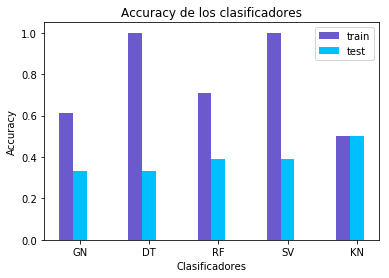

In [0]:
train=[GN_est.score(X_train, Y_train), DT_est.score(X_train, Y_train), 
      RF_est.score(X_train, Y_train), SV_est.score(X_train, Y_train), 
      KN_est.score(X_train, Y_train)]

test=[GN_est.score(X_test, Y_test), DT_est.score(X_test, Y_test), 
      RF_est.score(X_test, Y_test), SV_est.score(X_test, Y_test), 
      KN_est.score(X_test, Y_test)]

clas=["GN", "DT", "RF", "SV", "KN"]

barWidth=0.2

plt.bar(np.arange(len(train)), train, color="#6A5ACD", width=barWidth, label="train");
plt.bar([x + barWidth for x in np.arange(len(train))], test, color="#00BFFF", width=barWidth, label="test");
plt.xlabel("Clasificadores");
plt.ylabel("Accuracy");
plt.xticks([r + barWidth for r in range(len(train))], clas);
plt.title("Accuracy de los clasificadores");
plt.legend();
plt.show();

## Pruebas con los clasificadores aplicando PCA con las tres características

In [0]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA



GN_est = Pipeline((("pca", PCA(n_components=10)), ("classifier",GaussianNB())))
DT_est = Pipeline((("pca", PCA(n_components=10)), ("classifier",DecisionTreeClassifier())))
RF_est = Pipeline((("pca", PCA(n_components=10)), ("classifier",RandomForestClassifier(n_estimators=2))))
SV_est = Pipeline((("pca", PCA(n_components=10)), ("classifier",SVC(kernel='poly',degree=15))))
KN_est = Pipeline((("pca", PCA(n_components=10)), ("classifier",KNeighborsClassifier(n_neighbors=5))))

print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

print ("GaussianNB()")
GN_est.fit(X_train, Y_train)
GN=[GN_est.score(X_train, Y_train),GN_est.score(X_test, Y_test)]
print ("acierto en train", GN_est.score(X_train, Y_train))
print ("acierto en test ", GN_est.score(X_test, Y_test))
print ("")

print ("DecisionTreeClassifier()")
DT_est.fit(X_train, Y_train)
DT=[DT_est.score(X_train, Y_train),DT_est.score(X_test, Y_test)]
print ("acierto en train", DT_est.score(X_train, Y_train))
print ("acierto en test ", DT_est.score(X_test, Y_test))
print ("")


print ("RandomForestClassifier(n_estimators=2)")
RF_est.fit(X_train, Y_train)
RF=[RF_est.score(X_train, Y_train),RF_est.score(X_test, Y_test)]
print ("acierto en train", RF_est.score(X_train, Y_train))
print ("acierto en test ", RF_est.score(X_test, Y_test))
print ("")

print ("SVC(kernel='poly',degree=15)")
SV_est.fit(X_train, Y_train)
SV=[SV_est.score(X_train, Y_train),SV_est.score(X_test, Y_test)]
print ("acierto en train", SV_est.score(X_train, Y_train))
print ("acierto en test ", SV_est.score(X_test, Y_test))
print ("")

print ("KNeighborsClassifier(n_neighbors=5)")
KN_est.fit(X_train, Y_train)
KN=[KN_est.score(X_train, Y_train),KN_est.score(X_test, Y_test)]
print ("acierto en train", KN_est.score(X_train, Y_train))
print ("acierto en test ", KN_est.score(X_test, Y_test))
print ("")

dimensiones train (72, 10100) (72,)
dimsensions test  (18, 10100) (18,)

GaussianNB()
acierto en train 0.5694444444444444
acierto en test  0.5555555555555556

DecisionTreeClassifier()
acierto en train 1.0
acierto en test  0.4444444444444444

RandomForestClassifier(n_estimators=2)
acierto en train 0.7222222222222222
acierto en test  0.5555555555555556

SVC(kernel='poly',degree=15)
acierto en train 0.3611111111111111
acierto en test  0.2222222222222222

KNeighborsClassifier(n_neighbors=5)
acierto en train 0.4861111111111111
acierto en test  0.7222222222222222



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


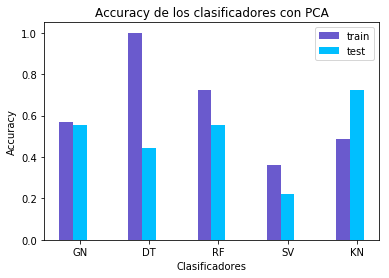

In [0]:
train=[GN_est.score(X_train, Y_train), DT_est.score(X_train, Y_train), 
      RF_est.score(X_train, Y_train), SV_est.score(X_train, Y_train), 
      KN_est.score(X_train, Y_train)]

test=[GN_est.score(X_test, Y_test), DT_est.score(X_test, Y_test), 
      RF_est.score(X_test, Y_test), SV_est.score(X_test, Y_test), 
      KN_est.score(X_test, Y_test)]

clas=["GN", "DT", "RF", "SV", "KN"]

barWidth=0.2

plt.bar(np.arange(len(train)), train, color="#6A5ACD", width=barWidth, label="train");
plt.bar([x + barWidth for x in np.arange(len(train))], test, color="#00BFFF", width=barWidth, label="test");
plt.xlabel("Clasificadores");
plt.ylabel("Accuracy");
plt.xticks([r + barWidth for r in range(len(train))], clas);
plt.title("Accuracy de los clasificadores con PCA");
plt.legend();
plt.show();

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=X[0].shape),
    keras.layers.Dense(6000, activation=tf.nn.relu),
    keras.layers.Dense(3000, activation=tf.nn.relu),
    keras.layers.Dense(1500, activation=tf.nn.relu),
    keras.layers.Dense(750, activation=tf.nn.relu),
    keras.layers.Dense(325, activation=tf.nn.relu),
    keras.layers.Dense(162, activation=tf.nn.relu),
    keras.layers.Dense(81, activation=tf.nn.relu),
    keras.layers.Dense(40, activation=tf.nn.relu),
    keras.layers.Dense(20, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])

model.summary()

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=25 , batch_size=5, validation_data=(X_test, Y_test))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 10100)             0         
_________________________________________________________________
dense_60 (Dense)             (None, 6000)              60606000  
_________________________________________________________________
dense_61 (Dense)             (None, 3000)              18003000  
_________________________________________________________________
dense_62 (Dense)             (None, 1500)              4501500   
_________________________________________________________________
dense_63 (Dense)             (None, 750)               1125750   
_________________________________________________________________
dense_64 (Dense)             (None, 325)               244075    
_________________________________________________________________
dense_65 (Dense)             (None, 162)             

In [0]:
#Se calcula el accuracy
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

18/18 [==============================] - 0s 6ms/sample - loss: 1.1054 - acc: 0.2222
Test accuracy: 0.22222222


#SEGUNDA ENTREGA

### GENERADOR DE AUDIOS A PARTIR DE LIBROSA

In [0]:
#Código para generar audios con diferente tono utilizando librosa
total = progressbar.ProgressBar(maxval=len(nombres_palabras))
total.start()
sr = 22050
total.update(0) #actualiza la barra de progreso y vuelve a hacer el padding
for i in range (len(nombres_palabras)):
  wav, sr = librosa.load(rutas_palabras+nombres_palabras[i], sr=sr)
  wa=librosa.effects.pitch_shift( wav , sr , -4 ) #se cambia el tono de la voz
  waves.write('/content/drive/My Drive/Proyecto Inteligencia Artificial/audios_librosa4/'+nombres_palabras[i][:-7]+'_'+str(i),sr,wa)
  total.update(i)
total.finish()

### Generar audios a partir de una función de cross_over

In [0]:
#Cogemos un audio orginial sin alterar y lo cruzamos con un audio alterado 
def cross_over(wav1, wav2):
    perm=np.random.permutation(range(len(wav1)))
    n=int(len(wav1)*0.5)
    wav=np.copy(wav1)
    for i in perm[:n]:
        wav[i]=wav2[i]
        
    return wav
  
#generar varios audios mediante cross over
sr = 22050
for i in range(len(nombres_palabras)):
  wav,sr = librosa.load(rutas_palabras+nombres_palabras[i],sr=sr)
  audiosl = wav2=librosa.effects.pitch_shift( wav , sr , 7)
  h = cross_over(wav,audiosl)
  waves.write('/content/drive/My Drive/Proyecto Inteligencia Artificial/Gas6/'+nombres_palabras[i][:-7]+'_'+str(i),sr,h)
  

In [0]:
def TSP_cross_over(solution1, solution2):
    p1 = int(len(solution1)*0.5)
    r1 = solution1[:p1]
    r2 = solution2[p1:]
    r = np.concatenate((r1,r2))
    return r

#generar varios audios mediante cross over
sr = 22050
for i in range(len(nombres_palabras)):
wav,sr = librosa.load(rutas_palabras+nombres_palabras[i],sr=sr)
audiosl = wav2=librosa.effects.pitch_shift( wav , sr , 7)
h = cross_over(wav,audiosl)
waves.write('/content/drive/My Drive/Proyecto Inteligencia Artificial/Gas6/'+nombres_palabras[i][:-7]+'_'+str(i),sr,h)

### DATASET FINAL

Finalmente aumentamos el dataset a ---- generando audios de las dos manera presentadas anteriormente, lo cual mejoro el accuaracy para pocas clases y quito el sobre aprendizaje para las cuarenta clases usadas.

In [3]:
data = pd.read_csv('/content/drive/My Drive/Proyecto Inteligencia Artificial/VoiceHelp.csv')
data.head(5)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,0,0.0,-471.485030,125.469306,-13.342482,12.436133,28.244390,-0.465541,11.069305,8.908579,-8.441748,4.237210,3.722279,-7.215398,3.302440,3.616325,-3.657370,2.256669,0.902384,-2.499167,2.233541,-0.388373,-2.261026,1.334508,-1.924040,-2.957253,0.702386,-0.312563,0.120869,1.078967,-1.256384,0.349151,1.983804,0.798309,2.942226,3.369830,1.218534,2.613185,2.689992,0.864109,...,-1.388267,-0.929233,-1.123180,-1.363220,-0.325020,0.333809,0.257162,0.102272,-0.557011,-0.853618,-0.547942,-0.693277,-0.995129,-1.115690,-0.988658,-0.547504,-0.653424,-1.010740,-0.928031,-1.164425,-1.175558,-0.455584,-0.380390,-0.575938,-0.323183,-0.665945,-1.070745,-0.855614,-0.899809,-0.753215,-0.282886,-0.558274,-0.830123,-0.583098,-0.698237,-0.746231,-0.560299,-0.814182,-0.756675,-0.235964
1,1,0.0,-594.427887,116.477546,-1.207670,21.935801,-5.526976,15.922393,-3.052477,6.542380,-8.319872,-3.956479,0.477507,-2.948379,-2.852335,-2.341800,-0.567821,-3.488476,1.422623,-2.254181,-5.169054,0.579542,-5.551017,0.210499,-3.564092,-0.938619,-1.336476,-0.051641,-1.562471,-1.305382,-1.350324,-2.417394,0.709248,-1.542224,2.112509,-1.049827,1.027031,-1.382516,-0.274421,-0.097034,...,-1.199694,-0.966062,-1.139984,-2.279950,-0.665678,-0.347000,1.117599,2.451528,2.580323,1.777354,0.757965,0.799626,0.363225,0.701946,0.692495,-0.476443,-1.000552,-0.551167,-0.067754,0.436839,-0.072259,-0.212304,-0.834293,-0.709180,-0.303614,-0.217397,-0.387776,-0.457849,-0.238538,-0.185269,-0.521963,-0.507622,-0.488978,-0.513331,-0.199221,-0.020115,-0.197439,-0.230385,-0.465230,-0.743771
2,2,0.0,-394.621400,97.205319,-17.105034,34.540555,-9.969733,6.654710,-4.908045,1.168185,-16.825914,3.884218,0.645793,-5.090411,4.692624,-11.269312,1.768608,2.487177,-5.253620,-1.830627,-1.123134,1.431257,-7.919880,5.397847,-5.109305,-1.245686,-1.708446,-3.878168,-4.607336,-2.735356,-2.688131,-2.769232,-0.965415,-3.580559,0.388106,-2.420809,0.035863,-1.874297,-2.402973,-2.024344,...,-1.904555,-2.232289,-1.881429,-0.775302,-1.487166,-1.975022,-2.498571,-2.039732,-2.785655,-2.272325,-1.643118,-1.001385,1.039348,2.792232,2.774503,2.384773,2.220328,2.099061,1.531294,1.475599,2.513055,1.328127,0.066550,0.072578,0.464341,0.933443,0.049316,-0.725793,-0.901161,-0.356080,0.199306,0.422384,0.230378,-0.764172,-0.831461,-0.008163,0.333875,0.473366,0.272964,0.040421
3,3,0.0,-444.915988,121.384522,0.696383,22.832245,-7.025455,7.269409,9.798246,16.111582,1.304437,13.087630,8.744211,0.222101,-0.627350,-1.993281,3.518904,-1.621470,0.581810,-0.457384,-6.384783,2.206559,-0.903394,-2.283153,0.478307,-0.623964,-5.295124,-2.601277,-1.502468,-3.859636,-2.727872,-3.321052,-0.143347,0.323178,-0.066459,1.660041,2.040993,3.080420,4.612306,1.824190,...,-2.947191,-0.715036,-0.861381,-1.775614,-2.817714,-2.072149,-0.247237,-0.011616,0.077804,0.054018,-0.126585,-0.106360,-0.994525,-1.249388,-1.322388,-0.907718,-0.285276,-0.113043,-1.276692,-1.376037,-1.394023,-0.810685,-0.271250,-0.320449,-0.561180,-0.897954,-0.765147,-0.260944,-0.898890,-1.539425,-0.707934,-0.616082,-0.224136,-0.291775,-0.613473,-0.338168,-0.036300,0.339943,-0.013490,-0.597965
4,4,0.0,-426.693228,111.907849,-7.034996,16.276892,-8.356899,6.914374,-13.547409,-1.418484,-11.525377,1.366405,-4.046036,-4.368451,-0.320017,2.150483,-0.039571,-2.913849,-2.972441,-2.532945,-3.952621,-2.764326,0.014417,0.459108,0.410433,-1.255265,-2.591824,-2.291795,-1.304703,-3.557298,-0.173919,-2.412303,-1.308553,-1.482356,-0.344092,2.319932,6.332409,7.729510,7.591750,3.307990,...,-1.292961,-0.915117,-1.527093,-1.227198,-0.428104,0.634667,0.643911,0.332652,1.473855,2.433295,1.777078,1.533154,1.888914,0.662880,-0.759830,-1.083460,-1.160769,-1.503823,-1.783720,-0.619370,0.395301,0.097605,0.094154,0.522822,0.561875,-0.189737,-0.252167,0.525336,0.410886,-0.4970

In [0]:
#Se establecen las variables 
X = data.values[:,2:]
Y=np.array(data.values[:,1],dtype=int)
#Se parten los datos para entrenar y predecir
n = int(len(X)*0.9)
tam=range(len(Y))
perm = np.random.permutation(len(tam))
X_train = X[perm[:n]]
Y_train = Y[perm[:n]]
X_test = X[perm[n:]]
Y_test = Y[perm[n:]]

### CLASIFICACIÓN SIN PCA

In [0]:
#el mejor n
x=[]
y=[]
maxi=0;
for i in range(1,30):
    neigh = RandomForestClassifier(n_estimators=i)
    neigh.fit(X_train, Y_train)
    x.append(i)
    score=neigh.score(X_test,Y_test)
    y.append(score) 
    if score>maxi:
        maxi=score
        ma=i
print ("El numero N con el mejor accuracy es:",ma)
nf=ma
plt.figure(figsize=(10,3))
plt.plot(x,y, color="red",label="Accuracy vs Numero de N estimators")
plt.xlabel("Numero de N estimators")
plt.ylabel("Accuracy")
plt.xlim(0,30)
plt.legend()

In [0]:
x=[]
y=[]
maxi=0;
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    x.append(i)
    score=neigh.score(X_test,Y_test)
    y.append(score) 
    if score>maxi:
        maxi=score
        ma=i
print ("El numero K con el mejor accuracy es:",ma)
num=ma
plt.figure(figsize=(10,3))
plt.plot(x,y, color="red",label="Accuracy vs Numero de K vecinos")
plt.xlabel("Numero de K vecinos")
plt.ylabel("Accuracy")
plt.xlim(0,30)
plt.legend()

In [7]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



GN_est = GaussianNB()
DT_est = DecisionTreeClassifier()
RF_est = RandomForestClassifier(n_estimators=1)
KN_est = KNeighborsClassifier(n_neighbors=5)
clf2 = RandomForestClassifier(n_estimators=1)
clf3 = KNeighborsClassifier(n_neighbors=10)
clf =  VotingClassifier(estimators=[('rf', clf2), ('gnb', clf3)], voting='hard')
LD = LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,solver='svd', store_covariance=False, tol=0.0001)
logreg = LogisticRegression(C=1, solver='liblinear')

print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

print ("GaussianNB()")
GN_est.fit(X_train, Y_train)
GN=[GN_est.score(X_train, Y_train),GN_est.score(X_test, Y_test)]
print ("acierto en train", GN_est.score(X_train, Y_train))
print ("acierto en test ", GN_est.score(X_test, Y_test))
print ("")

print ("DecisionTreeClassifier()")
DT_est.fit(X_train, Y_train)
DT=[DT_est.score(X_train, Y_train),DT_est.score(X_test, Y_test)]
print ("acierto en train", DT_est.score(X_train, Y_train))
print ("acierto en test ", DT_est.score(X_test, Y_test))
print ("")


print ("RandomForestClassifier(n_estimators=1)")
RF_est.fit(X_train, Y_train)
RF=[RF_est.score(X_train, Y_train),RF_est.score(X_test, Y_test)]
print ("acierto en train", RF_est.score(X_train, Y_train))
print ("acierto en test ", RF_est.score(X_test, Y_test))
print ("")


print ("KNeighborsClassifier(n_neighbors=5)")
KN_est.fit(X_train, Y_train)
KN=[KN_est.score(X_train, Y_train),KN_est.score(X_test, Y_test)]
print ("acierto en train", KN_est.score(X_train, Y_train))
print ("acierto en test ", KN_est.score(X_test, Y_test))
print ("")


print ("KNeighborsClassifier(n_neighbors=10) y RandomForestClassifier(n_estimators = 1)")
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)
print ("acierto en train", clf.score(X_train, Y_train))
print ("acierto en test ", clf.score(X_test, Y_test))
print ("")




dimensiones train (43700, 100) (43700,)
dimsensions test  (4856, 100) (4856,)

GaussianNB()
acierto en train 0.06796338672768878
acierto en test  0.05848434925864909

DecisionTreeClassifier()
acierto en train 1.0
acierto en test  0.4664332784184514

RandomForestClassifier(n_estimators=1)
acierto en train 0.7545308924485126
acierto en test  0.3373146622734761

KNeighborsClassifier(n_neighbors=5)
acierto en train 0.6912356979405034
acierto en test  0.42957166392092255

KNeighborsClassifier(n_neighbors=10) y RandomForestClassifier(n_estimators = 1)
acierto en train 0.5734324942791762
acierto en test  0.3270181219110379



In [23]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
print ("SGDClassifier(loss=hinge, penalty=l2, max_iter=5)")
clf_est.fit(X_train, Y_train)
CLF=[clf_est.score(X_train, Y_train),clf_est.score(X_test, Y_test)]
print ("acierto en train", clf_est.score(X_train, Y_train))
print ("acierto en test ", clf_est.score(X_test, Y_test))
print ("")

SGDClassifier(loss=hinge, penalty=l2, max_iter=5)
acierto en train 0.5690617848970252
acierto en test  0.3235172981878089



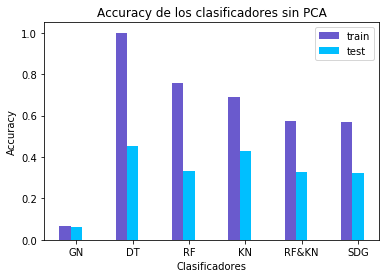

In [35]:
train=[0.06736842105263158, 1.0, 
       0.7564988558352402,0.6912356979405034, 0.5734324942791762,0.5690617848970252]

test=[0.05951400329489292, 0.45263591433278416, 
      0.3344316309719934, 0.42957166392092255, 
      0.3270181219110379,0.3235172981878089]

clas=["GN", "DT", "RF", "KN", "RF&KN","SDG"]

barWidth=0.2

plt.bar(np.arange(len(train)), train, color="#6A5ACD", width=barWidth, label="train");
plt.bar([x + barWidth for x in np.arange(len(train))], test, color="#00BFFF", width=barWidth, label="test");
plt.xlabel("Clasificadores");
plt.ylabel("Accuracy");
plt.xticks([r + barWidth for r in range(len(train))], clas);
plt.title("Accuracy de los clasificadores sin PCA");
plt.legend();
plt.show();

### CLASIFICACIÓN USANDO PCA

### PCA = 50

In [8]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


clf2 = RandomForestClassifier(n_estimators=1)
clf3 = KNeighborsClassifier(n_neighbors=10)
clf =  VotingClassifier(estimators=[('rf', clf2), ('gnb', clf3)], voting='hard')
GN_est = Pipeline((("pca", PCA(n_components=50)), ("classifier",GaussianNB())))
DT_est = Pipeline((("pca", PCA(n_components=50)), ("classifier",DecisionTreeClassifier())))
RF_est = Pipeline((("pca", PCA(n_components=50)), ("classifier",RandomForestClassifier(n_estimators=1))))
KN_est = Pipeline((("pca", PCA(n_components=50)), ("classifier",KNeighborsClassifier(n_neighbors=7))))
clf_est = Pipeline((("pca", PCA(n_components=50)), ("classifier",VotingClassifier(estimators=[('rf', clf2), ('gnb', clf3)], voting='hard'))))



print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

print ("GaussianNB()")
GN_est.fit(X_train, Y_train)
GN=[GN_est.score(X_train, Y_train),GN_est.score(X_test, Y_test)]
print ("acierto en train", GN_est.score(X_train, Y_train))
print ("acierto en test ", GN_est.score(X_test, Y_test))
print ("")

print ("DecisionTreeClassifier()")
DT_est.fit(X_train, Y_train)
DT=[DT_est.score(X_train, Y_train),DT_est.score(X_test, Y_test)]
print ("acierto en train", DT_est.score(X_train, Y_train))
print ("acierto en test ", DT_est.score(X_test, Y_test))
print ("")


print ("RandomForestClassifier(n_estimators=2)")
RF_est.fit(X_train, Y_train)
RF=[RF_est.score(X_train, Y_train),RF_est.score(X_test, Y_test)]
print ("acierto en train", RF_est.score(X_train, Y_train))
print ("acierto en test ", RF_est.score(X_test, Y_test))
print ("")


print ("KNeighborsClassifier(n_neighbors=70)")
KN_est.fit(X_train, Y_train)
KN=[KN_est.score(X_train, Y_train),KN_est.score(X_test, Y_test)]
print ("acierto en train", KN_est.score(X_train, Y_train))
print ("acierto en test ", KN_est.score(X_test, Y_test))
print ("")
              
              
print ("VotingClassifier(C=1, solver='liblinear')")
clf_est.fit(X_train, Y_train)
CLF=[clf_est.score(X_train, Y_train),clf_est.score(X_test, Y_test)]
print ("acierto en train", clf_est.score(X_train, Y_train))
print ("acierto en test ", clf_est.score(X_test, Y_test))
print ("")

dimensiones train (43700, 100) (43700,)
dimsensions test  (4856, 100) (4856,)

GaussianNB()
acierto en train 0.08
acierto en test  0.06754530477759473

DecisionTreeClassifier()
acierto en train 0.9883295194508009
acierto en test  0.45304777594728174

RandomForestClassifier(n_estimators=2)
acierto en train 0.7491533180778032
acierto en test  0.34637561779242176

KNeighborsClassifier(n_neighbors=70)
acierto en train 0.6070480549199084
acierto en test  0.3927100494233937

VotingClassifier(C=1, solver='liblinear')
acierto en train 0.5696796338672769
acierto en test  0.32248764415156506



In [20]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
print ("SGDClassifier(loss=hinge, penalty=l2, max_iter=5)")
clf_est.fit(X_train, Y_train)
CLF=[clf_est.score(X_train, Y_train),clf_est.score(X_test, Y_test)]
print ("acierto en train", clf_est.score(X_train, Y_train))
print ("acierto en test ", clf_est.score(X_test, Y_test))
print ("")

SGDClassifier(loss=hinge, penalty=l2, max_iter=5)
acierto en train 0.5682151029748284
acierto en test  0.3228995057660626



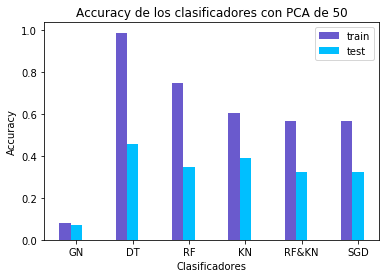

In [22]:
train=[0.08260869565217391, 0.9893135011441647, 
       0.7498169336384439,0.6070480549199084, 0.5696796338672769,0.5682151029748284]

test=[0.06960461285008238, 0.45572487644151566, 
      0.34637561779242176, 0.3927100494233937, 
      0.32248764415156506,0.3228995057660626]

clas=["GN", "DT", "RF", "KN", "RF&KN","SGD"]

barWidth=0.2

plt.bar(np.arange(len(train)), train, color="#6A5ACD", width=barWidth, label="train");
plt.bar([x + barWidth for x in np.arange(len(train))], test, color="#00BFFF", width=barWidth, label="test");
plt.xlabel("Clasificadores");
plt.ylabel("Accuracy");
plt.xticks([r + barWidth for r in range(len(train))], clas);
plt.title("Accuracy de los clasificadores con PCA de 50");
plt.legend();
plt.show();

### PCA = 45

In [16]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


clf2 = RandomForestClassifier(n_estimators=1)
clf3 = KNeighborsClassifier(n_neighbors=10)
clf =  VotingClassifier(estimators=[('rf', clf2), ('gnb', clf3)], voting='hard')
GN_est = Pipeline((("pca", PCA(n_components=45)), ("classifier",GaussianNB())))
DT_est = Pipeline((("pca", PCA(n_components=45)), ("classifier",DecisionTreeClassifier())))
RF_est = Pipeline((("pca", PCA(n_components=45)), ("classifier",RandomForestClassifier(n_estimators=1))))
KN_est = Pipeline((("pca", PCA(n_components=45)), ("classifier",KNeighborsClassifier(n_neighbors=7))))
clf_est = Pipeline((("pca", PCA(n_components=45)), ("classifier",VotingClassifier(estimators=[('rf', clf2), ('gnb', clf3)], voting='hard'))))



print ("dimensiones train", X_train.shape, Y_train.shape)
print ("dimsensions test ", X_test.shape, Y_test.shape)
print ("")

print ("GaussianNB()")
GN_est.fit(X_train, Y_train)
GN=[GN_est.score(X_train, Y_train),GN_est.score(X_test, Y_test)]
print ("acierto en train", GN_est.score(X_train, Y_train))
print ("acierto en test ", GN_est.score(X_test, Y_test))
print ("")

print ("DecisionTreeClassifier()")
DT_est.fit(X_train, Y_train)
DT=[DT_est.score(X_train, Y_train),DT_est.score(X_test, Y_test)]
print ("acierto en train", DT_est.score(X_train, Y_train))
print ("acierto en test ", DT_est.score(X_test, Y_test))
print ("")


print ("RandomForestClassifier(n_estimators=1)")
RF_est.fit(X_train, Y_train)
RF=[RF_est.score(X_train, Y_train),RF_est.score(X_test, Y_test)]
print ("acierto en train", RF_est.score(X_train, Y_train))
print ("acierto en test ", RF_est.score(X_test, Y_test))
print ("")


print ("KNeighborsClassifier(n_neighbors=7)")
KN_est.fit(X_train, Y_train)
KN=[KN_est.score(X_train, Y_train),KN_est.score(X_test, Y_test)]
print ("acierto en train", KN_est.score(X_train, Y_train))
print ("acierto en test ", KN_est.score(X_test, Y_test))
print ("")
              
              
print ("VotingClassifier(C=1, solver='liblinear')")
clf_est.fit(X_train, Y_train)
CLF=[clf_est.score(X_train, Y_train),clf_est.score(X_test, Y_test)]
print ("acierto en train", clf_est.score(X_train, Y_train))
print ("acierto en test ", clf_est.score(X_test, Y_test))
print ("")

dimensiones train (43700, 100) (43700,)
dimsensions test  (4856, 100) (4856,)

GaussianNB()
acierto en train 0.08162471395881007
acierto en test  0.06960461285008238

DecisionTreeClassifier()
acierto en train 0.991441647597254
acierto en test  0.4594316309719934

RandomForestClassifier(n_estimators=1)
acierto en train 0.7457894736842106
acierto en test  0.33278418451400327

KNeighborsClassifier(n_neighbors=7)
acierto en train 0.6050343249427917
acierto en test  0.3894151565074135

VotingClassifier(C=1, solver='liblinear')
acierto en train 0.5681235697940503
acierto en test  0.3257825370675453



In [25]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
print ("SGDClassifier(loss=hinge, penalty=l2, max_iter=5)")
clf_est.fit(X_train, Y_train)
CLF=[clf_est.score(X_train, Y_train),clf_est.score(X_test, Y_test)]
print ("acierto en train", clf_est.score(X_train, Y_train))
print ("acierto en test ", clf_est.score(X_test, Y_test))
print ("")

SGDClassifier(loss=hinge, penalty=l2, max_iter=5)
acierto en train 0.5706178489702517
acierto en test  0.3247528830313015



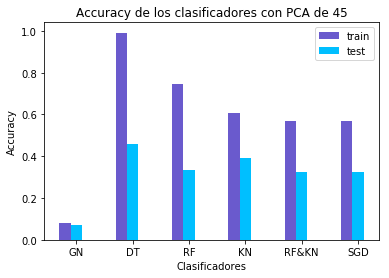

In [27]:
train=[0.08162471395881007, 0.991441647597254, 
      0.7457894736842106,0.6050343249427917, 0.5681235697940503,0.5706178489702517]

test=[0.06960461285008238,0.4594316309719934, 
      0.33278418451400327, 0.3894151565074135, 
       0.3257825370675453,0.3247528830313015]

clas=["GN", "DT", "RF", "KN", "RF&KN","SGD"]

barWidth=0.2

plt.bar(np.arange(len(train)), train, color="#6A5ACD", width=barWidth, label="train");
plt.bar([x + barWidth for x in np.arange(len(train))], test, color="#00BFFF", width=barWidth, label="test");
plt.xlabel("Clasificadores");
plt.ylabel("Accuracy");
plt.xticks([r + barWidth for r in range(len(train))], clas);
plt.title("Accuracy de los clasificadores con PCA de 45");
plt.legend();
plt.show();

## Clasificando con K_fold y RepeatedKFold

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import *


clf2 = RandomForestClassifier(n_estimators=4)
clf3 = KNeighborsClassifier(n_neighbors=10)


est =  VotingClassifier(estimators=[('rf', clf2), ('gnb', clf3)], voting='hard')
s = cross_val_score(est, X, Y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print (s)
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

s2 = cross_val_score(est, X, Y, cv=RepeatedKFold(n_splits=20, n_repeats=2, random_state=2652124), scoring=make_scorer(accuracy_score))
print (s2)
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s2), np.std(s2)))

[0.29365733 0.28397858 0.29633443 0.29015651 0.29571664 0.29592257
 0.30401648 0.29598352 0.28980433 0.2930999 ]
accuracy 0.294 (+/- 0.00500)
[0.30724876 0.2961285  0.30889621 0.3121911  0.28912685 0.30518946
 0.29983526 0.30107084 0.30395387 0.29406919 0.30930807 0.31136738
 0.29242175 0.31342669 0.31342669 0.30766063 0.31644005 0.30902349
 0.29542645 0.29666255 0.30930807 0.30024712 0.29654036 0.28995058
 0.31630972 0.29901153 0.31589786 0.32742998 0.29901153 0.31425041
 0.30024712 0.31630972 0.30601318 0.28747941 0.30354201 0.30930807
 0.31437989 0.28842192 0.29089411 0.2921302 ]
accuracy 0.304 (+/- 0.00956)


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import *


est = KNeighborsClassifier(n_neighbors=7)
s = cross_val_score(est, X, Y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print (s)
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

s2 = cross_val_score(est, X, Y, cv=RepeatedKFold(n_splits=10, n_repeats=2, random_state=2652124), scoring=make_scorer(accuracy_score))
print (s2)
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s2), np.std(s2)))

[0.38612026 0.38509061 0.38158979 0.38179572 0.37397035 0.38261944
 0.37713697 0.38393409 0.3938208  0.3969104 ]
accuracy 0.384 (+/- 0.00654)
[0.38776771 0.38385502 0.38797364 0.38385502 0.38364909 0.3970346
 0.39134912 0.40391349 0.38619979 0.37960865 0.39147446 0.38220758
 0.38962109 0.38920923 0.39456343 0.38941516 0.38825953 0.37734295
 0.37837281 0.38887745]
accuracy 0.388 (+/- 0.00622)


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import *


est = RandomForestClassifier(n_estimators=4)
s = cross_val_score(est, X, Y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print (s)
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

s2 = cross_val_score(est, X, Y, cv=RepeatedKFold(n_splits=20, n_repeats=2, random_state=2652124), scoring=make_scorer(accuracy_score))
print (s2)
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s2), np.std(s2)))

[0.40980231 0.42504119 0.42607084 0.41453871 0.42524712 0.41783361
 0.42018538 0.41029866 0.41338826 0.40556128]
accuracy 0.417 (+/- 0.00687)
[0.4238056  0.43204283 0.42009885 0.44275124 0.42009885 0.42668863
 0.43945634 0.43739703 0.44275124 0.42051071 0.434514   0.44728171
 0.41803954 0.434514   0.43616145 0.41474465 0.43180882 0.4276885
 0.41532756 0.42645241 0.43121911 0.44110379 0.43039539 0.40939044
 0.43657331 0.42133443 0.43080725 0.4291598  0.42504119 0.42874794
 0.43327842 0.44028007 0.43080725 0.41433278 0.42586491 0.43410214
 0.4276885  0.42933663 0.42604038 0.42356819]
accuracy 0.429 (+/- 0.00854)


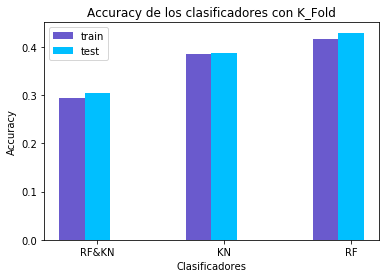

In [31]:
train=[0.294 , 0.384 , 0.417 ]

test=[0.304 ,0.388 , 
      0.429 ]

clas=["RF&KN", "KN", "RF"]

barWidth=0.2

plt.bar(np.arange(len(train)), train, color="#6A5ACD", width=barWidth, label="train");
plt.bar([x + barWidth for x in np.arange(len(train))], test, color="#00BFFF", width=barWidth, label="test");
plt.xlabel("Clasificadores");
plt.ylabel("Accuracy");
plt.xticks([r + barWidth for r in range(len(train))], clas);
plt.title("Accuracy de los clasificadores con K_Fold");
plt.legend();
plt.show();

### Red Neuronal

In [36]:

model = keras.models.Sequential([
    keras.layers.Flatten( input_shape=X[0].shape),
    keras.layers.Dense(3000, activation=tf.nn.relu),
    keras.layers.Dense(325, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(40, activation=tf.nn.softmax)
])

model.summary()

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10 , batch_size=5, validation_data=(X_test, Y_test))

W0820 04:17:14.122208 140658966660992 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 3000)              303000    
_________________________________________________________________
dense_1 (Dense)              (None, 325)               975325    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               32600     
_________________________________________________________________
dense_3 (Dense)              (None, 40)                4040      
Total params: 1,314,965
Trainable params: 1,314,965
Non-trainable params: 0
_________________________________________________________________
Train on 43700 samples, validate on 4856 samples
Epoch 1/10
43700/43700 [==============================] - 71s 2

In [37]:
#Se calcula el accuracy
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

4856/4856 [==============================] - 1s 114us/sample - loss: 3.6904 - acc: 0.0253
Test accuracy: 0.02532949


## APRENDIZAJE NO SURPERVISADO

1. Permutando los audios confirmando que de esta forma se generará ruido, posteriormente se saca un MFCC de dos de los audios originales y de los audios permutados para encontrar dos cluster 

In [0]:
import librosa
import IPython.display as ipd
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
import progressbar, time
import pandas as pd
#Generar ruído
sr=22050
rutas_palabras = "/content/drive/My Drive/Proyecto Inteligencia Artificial/palabras/"
nombres_palabras = os.listdir(rutas_palabras)
nombres_palabras.sort()
clases=np.array(([0, 'adios'],[1, 'agua'],[2, 'ahora'],[3, 'amar'],[4, 'amigo'],[5, 'aprender'],[6, 'arbol'],[7, 'autobus'],[8, 'ayer'],[9, 'boligrafo'],
               [10,'bonito'],[11,'bueno'],[12,'cabeza'],[13,'calle'],[14,'cama'],[15,'cancion'],[16,'casa'],[17,'ciudad'],[18,'coche'],[19,'colegio'],
               [20,'comida'],[21,'contento'],[22,'correr'],[23,'cosa'],[24,'chica'],[25,'chico'],[26,'dar'],[27,'decir'],[28,'deporte'],[29,'dia'],
               [30,'dificil'],[31,'dinero'],[32,'facil'],[33,'familia'],[34,'feo'],[35,'flor'],[36,'fiesta'],[37,'fuerte'],[38,'galleta'],[39,'gente']))

total = progressbar.ProgressBar(maxval=len(nombres_palabras))
total.start()
for i in range(len(nombres_palabras)):
  rutas = rutas_palabras+nombres_palabras[i]
  wav, sr = librosa.load(rutas, sr=sr) #carga archivos .wav
  c = np.array(wav)
  permut_temp = np.random.permutation(c)
  waves.write('/content/drive/My Drive/Proyecto Inteligencia Artificial/ruido/'+nombres_palabras[i],sr,permut_temp)
  total.update(i)
total.finish()


#generar mfcc de dos caracteristicas
def mfcc(wa1,wa2):
  mfcc1 = librosa.feature.mfcc(y=wa1, sr=sr, n_mfcc=2, dct_type=2,norm='ortho')
  mf1 = []
  for i in range(len(mfcc1[:,0])):
    den = mfcc1[i,:]
    sum = np.sum(den)/len(mfcc1[0,:]) #Saca la media de cada uno de las mfcc
    mf1.append(sum)
    
  mfcc2 = librosa.feature.mfcc(y=wa2, sr=sr, n_mfcc=2, dct_type=2,norm='ortho')
  mf2 = []
  for i in range(len(mfcc2[:,0])):
    den = mfcc2[i,:]
    sum = np.sum(den)/len(mfcc2[0,:]) #Saca la media de cada uno de las mfcc
    mf2.append(sum)
    
  return mf1,mf2

#crear CSV 
#Barra de progreso 
sr=22050
rutas_palabras1 = "/content/drive/My Drive/Proyecto Inteligencia Artificial/palabras/"
nombres_palabras1 = os.listdir(rutas_palabras1)
nombres_palabras1.sort()
rutas_palabras2 = "/content/drive/My Drive/Proyecto Inteligencia Artificial/ruido/"
nombres_palabras2 = os.listdir(rutas_palabras2)
nombres_palabras2.sort()
clases=np.array(([0, 'adios'],[1, 'agua'],[2, 'ahora'],[3, 'amar'],[4, 'amigo'],[5, 'aprender'],[6, 'arbol'],[7, 'autobus'],[8, 'ayer'],[9, 'boligrafo'],
               [10,'bonito'],[11,'bueno'],[12,'cabeza'],[13,'calle'],[14,'cama'],[15,'cancion'],[16,'casa'],[17,'ciudad'],[18,'coche'],[19,'colegio'],
               [20,'comida'],[21,'contento'],[22,'correr'],[23,'cosa'],[24,'chica'],[25,'chico'],[26,'dar'],[27,'decir'],[28,'deporte'],[29,'dia'],
               [30,'dificil'],[31,'dinero'],[32,'facil'],[33,'familia'],[34,'feo'],[35,'flor'],[36,'fiesta'],[37,'fuerte'],[38,'galleta'],[39,'gente']))

total = progressbar.ProgressBar(maxval=len(nombres_palabras))
total.start()
X=[]
Y=[]
for i in range(len(nombres_palabras)):
  ruta1 = rutas_palabras1+nombres_palabras[i]
  ruta2 = rutas_palabras2+nombres_palabras[i]
  wav1, sr = librosa.load(ruta1, sr=sr) #carga archivos .wav
  wav2, sr = librosa.load(ruta2, sr=sr)
  mf1, mf2 = mfcc(wav1,wav2)
  X.append(mf1)
  palabra1 = nombres_palabras[i].split("0")[0]
  clase1 = palabra1 == clases[:,1]
  for k in range(len(clase1)):
    if clase1[k]==True:
      Y.append(int(clases[k,0]))
  X.append(mf2)
  palabra2 = nombres_palabras[i].split("0")[0]
  clase2 = palabra2 == clases[:,1]
  for k in range(len(clase2)):
    if clase2[k]==True:
      Y.append(int(clases[k,0]))
  if len(Y)!=len(X):
    print (nombres_palabras1[i], nombres_palabras2[i])
    break
  total.update(i)
X=np.array(X)
Y=np.array(Y)
total.finish()

In [0]:
#KMEAN Y DBSCAN
from sklearn.datasets import *
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN


kmeans = KMeans(n_clusters=2)  
kmeans.fit_transform(X)  

DBS = DBSCAN(eps=15)
#AgglomerativeClustering(n_clusters=2, linkage= "ward")
DBS.fit(X) 
plt.figure(figsize=(15, 5))  
plt.subplot(131)
plt.scatter(X[:,0], X[:,1], cmap='rainbow') 
plt.subplot(132)
plt.title("BDScan")
plt.xlabel("Annual income")
plt.ylabel("Spending score ")
plt.grid(alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=DBS.labels_,marker='.' , cmap='rainbow')  
plt.subplot(133)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, marker='.' ,cmap='rainbow') 
plt.xlabel("Annual income")
plt.title("K-means")
plt.grid(alpha=0.2)

In [0]:
#Usando Birch
from sklearn.cluster import Birch
clustering = Birch(branching_factor=100, n_clusters=2, threshold=0.1,compute_labels=True).fit(X)
clustering.predict(X)
plt.scatter(X[:,0],(X[:,1]), c=clustering.labels_, cmap='rainbow')  
plt.scatter(clustering.subcluster_centers_[:,0],clustering.subcluster_centers_[:,1],marker='.' , color='black')  

In [0]:
#Compara cuantas hay de clase ruído y de clase Audio
x = [0,1]
y = [2848,2730]
#-*- coding: utf-8 -*-
import matplotlib.pyplot as plt

fig = plt.figure(u'Gráfica de barras') # Figure
ax = fig.add_subplot(111) # Axes
nombres = ['Clase A','Clase B']

ax.bar(x, y, width=0.8, align='center')
ax.set_xticks(x)
ax.set_xticklabels(nombres)

plt.show()

2. Uniendo el dataset de audios originales con el dataset de audios generados mediante la función de cross_over.

In [0]:
import pandas as pd
p1 = pd.read_csv('/content/drive/My Drive/Proyecto Inteligencia Artificial/gas1-2.csv')
p2 = pd.read_csv('/content/drive/My Drive/Proyecto Inteligencia Artificial/palabras2.csv')

p11 = pd.concat([p1,p2])
p = p11.values

from sklearn.datasets import *
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN


kmeans = KMeans(n_clusters=2)  
kmeans.fit_transform(p[:,1:])  

DBS = DBSCAN(eps=40)
#AgglomerativeClustering(n_clusters=2, linkage= "ward")
DBS.fit(p) 
plt.figure(figsize=(15, 5))  
plt.subplot(131)
plt.scatter(p[:,1], p[:,2], cmap='rainbow') 
plt.subplot(132)
plt.title("BDScan")
plt.xlabel("Annual income")
plt.ylabel("Spending score ")
plt.grid(alpha=0.2)
plt.scatter(p[:,1], p[:,1], c=DBS.labels_,marker='.' , cmap='rainbow')  
plt.subplot(133)
plt.scatter(p[:,1], p[:,2], c=kmeans.labels_, marker='.' ,cmap='rainbow') 
plt.xlabel("Annual income")
plt.title("K-means")
plt.grid(alpha=0.2)